In [86]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [87]:
x = tf.placeholder(tf.float32,[None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)



init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


performance = []

for i in range(100):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    performance.append(sess.run(cross_entropy,feed_dict={x: mnist.train.images, y_: mnist.train.labels}))




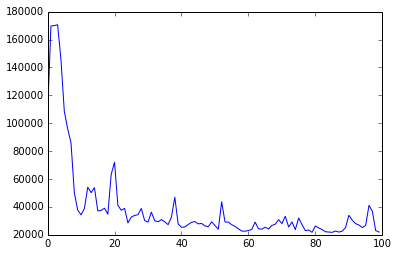

In [88]:
plt.plot(performance)
plt.show()

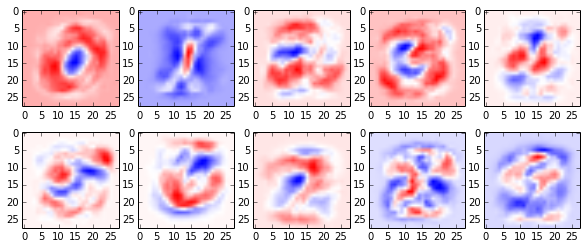

In [89]:
import pylab as pylab

pylab.rcParams['figure.figsize'] = (10.0, 4.0)

fW = sess.run(W)

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(np.asarray(fW[:,i]).reshape((28,28)), cmap="bwr")

In [84]:
print sess.run(b)

[-0.17001761  0.21901055  0.02992516 -0.08622042  0.09268268  0.50796193
 -0.07288841  0.25896153 -0.62854999 -0.15086481]
